<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.3: Measurements

Building upon the forward feature selection technique, we apply it to the diabetes dataset. By iterating over the entire dataset, we identify the subset of features that yield the best adjusted R-squared score. Furthermore, we visualise the results by plotting the R-squared and adjusted R-squared values, providing insights into the model's performance with different feature combinations.

In [1]:
## Import Libraries

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 1.1 Load Diabetics Data Using datasets of sklearn

In [2]:
## Load the Diabetes Housing dataset

# Load the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

In [3]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [5]:
df = pd.DataFrame(diabetes.data)
df.head().T

,0,1,2,3,4
0,0.038076,-0.001882,0.085299,-0.089063,0.005383
1,0.050680,-0.044642,0.050680,-0.044642,-0.044642
2,0.061696,-0.051474,0.044451,-0.011595,-0.036385
3,0.021872,-0.026328,-0.005670,-0.036656,0.021872
4,-0.044223,-0.008449,-0.045599,0.012191,0.003935
5,-0.034821,-0.019163,-0.034194,0.024991,0.015596
6,-0.043401,0.074412,-0.032356,-0.036038,0.008142
7,-0.002592,-0.039493,-0.002592,0.034309,-0.002592
8,0.019907,-0.068332,0.002861,0.022688,-0.031988
9,-0.017646,-0.092204,-0.025930,-0.009362,-0.046641


In [6]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
1,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
2,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
3,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
4,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
5,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
6,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
7,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
8,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
9,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [8]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [9]:
# Target
y = diabetes.target

In [10]:
X.shape

(442, 10)

In [11]:
y.shape

(442,)

In [12]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
print(X_train.shape,y_train.shape)

(353, 10) (353,)


In [14]:
df.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
1,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
2,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
3,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
4,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
5,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
6,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
7,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
8,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
9,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


#### 1.2 Use Forward Feature Selection to pick a good model

**Hint: Same as Lab 4.2.2**

- Add R^2 value in a list
- Add Adjusted R^2 in another list
- Display both R^2 and Adjusted R^2

In [31]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [33]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False

    if show_steps:
        print('')

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))

    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))

    # for each remaining feature to be evaluated
    for new_column in excluded:

        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' %
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' %
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' %
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature bmi  with R^2 = 0.366 and adjusted R^2 = 0.364
Added feature s5   with R^2 = 0.458 and adjusted R^2 = 0.455
Added feature bp   with R^2 = 0.483 and adjusted R^2 = 0.479
Added feature s1   with R^2 = 0.499 and adjusted R^2 = 0.493
Added feature s2   with R^2 = 0.509 and adjusted R^2 = 0.502
Added feature sex  with R^2 = 0.523 and adjusted R^2 = 0.515
Added feature s4   with R^2 = 0.526 and adjusted R^2 = 0.516
**************************************************

Resulting features:
bmi, s5, bp, s1, s2, sex, s4


In [32]:
## Use Forward Feature Selection to pick a good model
# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]
r2_list = []
adjusted_r2_list = []

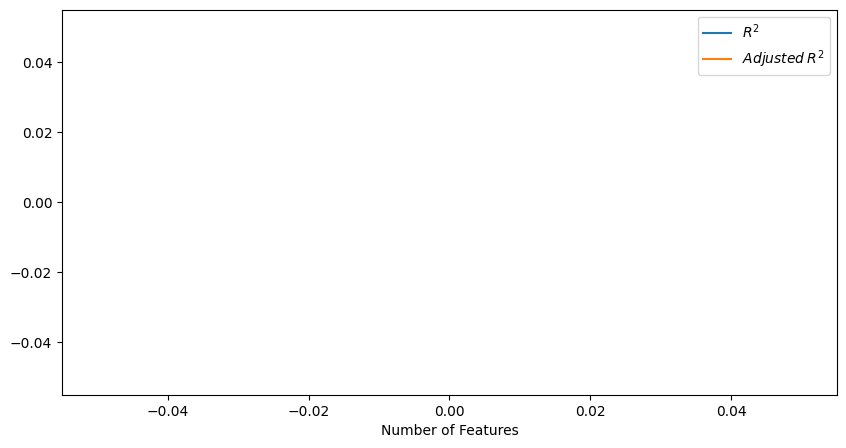

In [34]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



